# Simple linear regression (with statsmodels and sklearn)

## Import the relevant libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()
#We will code using matplotlib but use seaborn styles. 

## Load the data

Load the data from a .csv 

In [31]:
data = pd.read_csv('/Users/ranjanadobal/Documents/Github/Repos/My_folder/Python_Programming_Data_Science/Data_Science_Bootcamp/1.Simple Linear Regression/Data/1.01.+Simple+linear+regression.csv')

Check what is in the data frame

In [32]:
data

SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]

The dataframe has 2 columns SAT and GPA. We predict GPA using SAT because SAT is considered one of the best estimators of intellectual capability and all colleges use SAT as a proxy for admission. 

### Print the descriptive statistics for each column in the data frame. 

This method gives us descriptive statistics

In [33]:
data.describe()

SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000

This dataset has data for 84 students and we will predict the GPA of students based on their SAT scores. 

# Create your first regression

## Define the dependent and the independent variables

The regression equation is:  Y hat = B0 + B1*X1

Following the regression equation, our dependent variable (y) is the GPA. Similarly, our independent variable (x) is the SAT score.

In [34]:
y = data ['GPA']
x1 = data ['SAT']

## Explore the data

Plot a scatter plot by first putting the horizontal axis, then the vertical axis

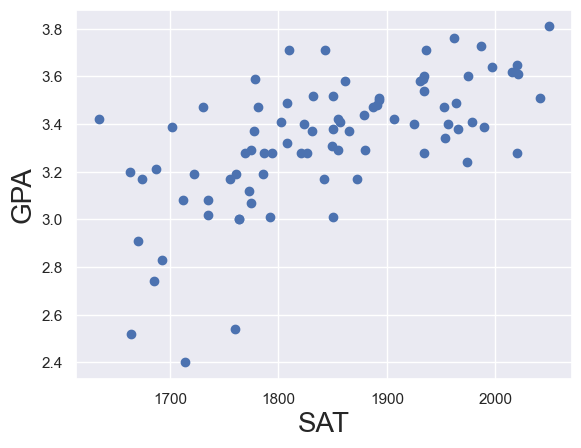

In [35]:
plt.scatter(x1,y)
###Name the axes here
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
###Show the plot
plt.show()

There is a strong relationship between SAT and GPA. Higher the SAT of a student,the higher their GPA.

## Regression itself

The coefficient B0 is alone in the regression equation without X0. X0 is always 1. 

### Declare a new variable x for the regression equation. 

'results' will contain the output of the ordinary least squares regression or OLS. fit() is a method to obtain the fit of the model. summary() gives the regression results that has 3 main tables - a model summary, a coefficients table, and some additional tests.  

In [36]:
#Add a constant. Add a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
#Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
#Print a summary of the regression using statsmodels. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           7.20e-11
Time:                        16:14:25   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The intercept B0 is 0.275 and the B1 coefficient is 0.0017. So the regression equation is yhat = 0.0017*x1 + 0.275.
GPA = 0.0017*SAT + 0.275. 
GPA for a person with SAT score 1700 is 3.165. So the expected GPA is 3.165. 
The hypothesis test checks whether the coefficients are zero or whether these variables are important in predicting the GPA. The p-value for SAT variable is 0.000 and it is <0.05, that means the SAT variable is a significant variable in this model and the coefficient of SAT variable is different from zero. 
Lower the standard error for each variable, better is the estimate. 

R-squared is the ratio of variability explained by the regression by the total variability of the dataset and it is 0.406. This implies that SAT scores explain 41% of the variability of the GPA for our sample. We might be missing some more information. R-squared is called goodness of fit of the model and it will increase with more factors in the model. 

The F-statistic for this Simple Linear Regression model is 56.05 and the p-value is less than 0.05. The overall model is significant. 

### Plot the regression line (the best fitting line that is closest to all observations). 

Create a scatter plot. Define the regression equation, so we can plot it later. Plot the regression line against the independent variable (SAT). Label the axes.

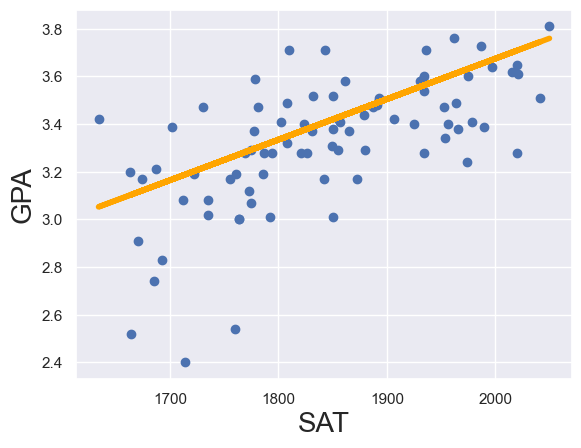

In [58]:
plt.scatter(x1,y)

yhat = 0.0017*x1 + 0.275

fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Plot the regression line by making the intercept zero. The regression line will pass through the origin. 

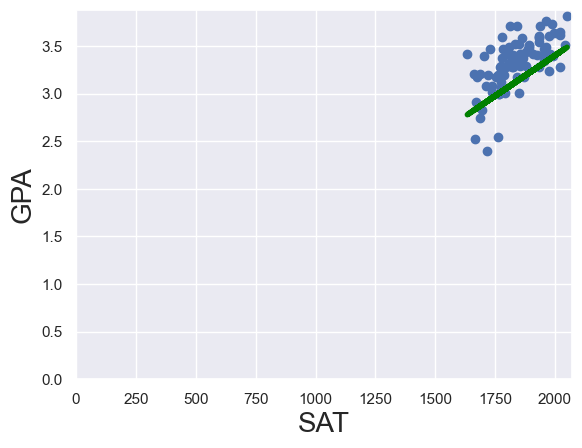

In [38]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0
fig = plt.plot(x1,yhat, lw=4, c='green', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
#Set the limits of the axes on the left to zero. 
plt.xlim(0)
plt.ylim(0)
plt.show()

Plot the regression line with zero coefficient of the x1 variable. The regression line will be a horizontal line. 

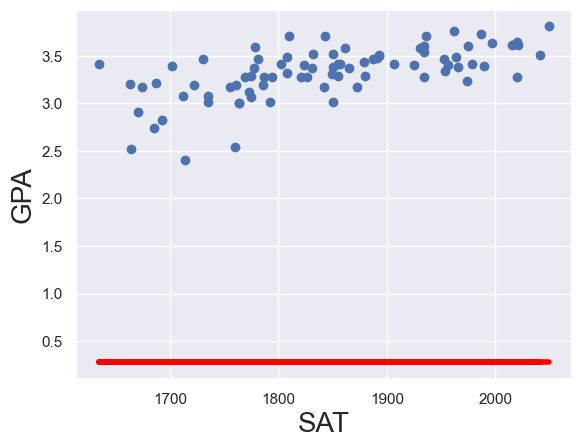

In [39]:
plt.scatter(x1,y)
yhat = 0*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='red', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Simple Linear Regression using sklearn (machine learning module)

## Import the relevant libraries

In [40]:
from sklearn.linear_model import LinearRegression

Let's explore the top 5 rows of the df. 

In [41]:
data.head()

SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83

## Create the regression 

### Declare the independent and dependent variables

There is a single independent variable: 'SAT' and a single dependedent variable: 'GPA'

In [42]:
x = data['SAT']
y = data['GPA']

While fitting the model, all data frames have to be converted into ndarrays. 

Use the word 'features' instead of 'variables' in machine learning. We are predicting GPA using SAT score. X is called input or feature. Y is called output or target. We will use supervised machine learning where we have features and targets. The machine learning algorithm will find the optimal coefficients of a linear regression model that best predict the GPA. 

### Check the shapes of the features. 

In [43]:
x.shape

(84,)

In [44]:
y.shape

(84,)

They are both vectors of length 84. Now we can feed these features to our algorithm. 

In order to feed x to sklearn, it should be a 2D array (a matrix).
Therefore, we must reshape it.
Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default).
x_matrix = x.values.reshape(84,1). reshape(-1,1) is a more generalized approach. 

In [45]:
x_matrix = x.values.reshape(-1,1)

The one-dimensional object is changed into a two-dimensional object. 

In [46]:
x_matrix

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

Check the shape just in case

In [47]:
x_matrix.shape

(84, 1)

### Regression

Create a linear regression object.

In [48]:
reg = LinearRegression()

reg is an instance of the linear regression class. 
The whole learning process boils down to fitting the regression
Note that the first argument is the independent variable, while the second - the dependent 

In [49]:
reg.fit(x_matrix,y)

LinearRegression()

### R-squared

To get the R-squared in sklearn, use score() method

In [50]:
reg.score(x_matrix,y)

0.40600391479679765

This is the same score as we got from statsmodels. 

### Coefficients

Getting the coefficients of the regression
Note that the output is an array, as we usually expect several coefficients


In [51]:
reg.coef_

array([0.00165569])

### Intercept

Getting the intercept of the regression
Note that the result is a float as we usually expect a single value in this regression. 

In [52]:
reg.intercept_

0.2750402996602803

### Making predictions

There is a dedicated method should we want to predict values
Note that the result is an array, as we can predict more than one value at a time

To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT.


In [53]:
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

SAT
0  1740
1  1760

We can predict the whole data frame in bulk. Note that the result is an array, this time with 2 elements

In [54]:
reg.predict(new_data)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

Finally, we can directly store the predictions in a new series of the same dataframe

In [55]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


SAT  Predicted_GPA
0  1740       3.155938
1  1760       3.189051

Parametrized version of the regression line

In [56]:
yhat = reg.coef_*x_matrix + reg.intercept_

Non-parametrized version of the regression line
yhat = 0.0017*x + 0.275

There are different ways to plot the data - here's the matplotlib code. Plot the regression line. Label our axes. 

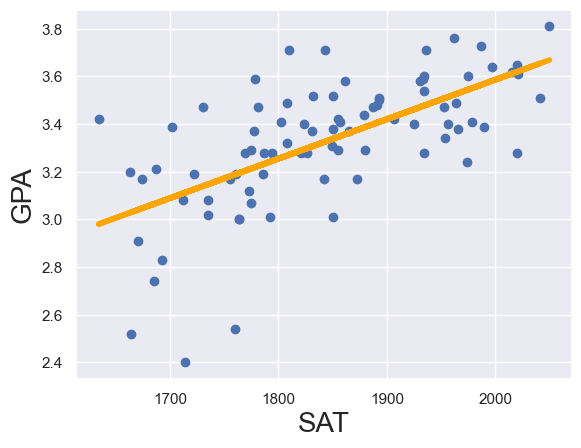

In [57]:
plt.scatter(x,y)

fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()